In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from os import path
from fantasyfootball.config import DATA_DIR
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [6]:
file_path = r'..\data\weekly-analysis\2020'
week1 = pd.read_csv(path.join(file_path,'2020_week_1.csv'))
week2 = pd.read_csv(path.join(file_path,'2020_week_2.csv'))

In [7]:
week1.head()

,rk,player_name,pos,age,date,lg,tm,home/away,opp,result,...,rushing_att,rushing_yds,rushing_y/a,rushing_td,receiving_tgt,receiving_rec,receiving_yds,receiving_y/r,receiving_td,receiving_y/tgt
0,1,Clyde Edwards-Helaire,RB,21.152,2020-09-10,NFL,KAN,Home,HOU,W 34-20,...,25.0,138.0,5.52,1.0,2.0,0.0,0.0,NaN,0.0,0.00
1,2,Derrick Henry,RB,26.254,2020-09-14,NFL,TEN,Away,DEN,W 16-14,...,31.0,116.0,3.74,0.0,3.0,3.0,15.0,5.00,0.0,5.00
2,3,Benny Snell Jr.,RB,22.200,2020-09-14,NFL,PIT,Away,NYG,W 26-16,...,19.0,113.0,5.95,0.0,1.0,0.0,0.0,NaN,0.0,0.00
3,4,Christian McCaffrey,RB,24.098,2020-09-13,NFL,CAR,Home,LVR,L 30-34,...,23.0,97.0,4.22,2.0,4.0,3.0,38.0,12.67,0.0,9.50
4,5,Ezekiel Elliott,RB,25.053,2020-09-13,NFL,DAL,Away,LAR,L 17-20,...,22.0,96.0,4.36,1.0,4.0,3.0,31.0,10.33,1.0,7.75


In [8]:
def pfr_transform_df(df):
    df = (df.copy()
            .rename(columns={'receiving_tgt': 'tgt_ind', 'rushing_att': 'att_ind'})
         )
    df['att_tm'] = df.loc[df['pos'] == 'RB'].groupby('tm')['att_ind'].transform('sum')
    df['tgt_tm'] = df.groupby('tm')['tgt_ind'].transform('sum')
    df['rushing_share'] = df['att_ind'] / df['att_tm']
    df['tgt_share'] = df['tgt_ind'] / df['tgt_tm']
    return df

In [9]:
week1 = pfr_transform_df(week1)
week2 = pfr_transform_df(week2)

In [10]:
# add your players to the list so we can highlight them in the charts
player_list = [
        'Clyde Edwards-Helaire',
        'Allen Robinson II',
        'Adam Thielen',
        'Robert Woods',
        'Austin Ekeler',
        'Joe Mixon',
        'Terry McLaurin',
        'Todd Gurley II',
        'Chris Carson',
        'Stefon Diggs',
        'Miles Sanders',
        'Diontae Johnson',
        'Jarvis Landry',
        'CeeDee Lamb',
        'Melvin Gordon III',
        'John Brown',
        'Hunter Henry',
        'Mark Ingram II',
        'James White',
        'Hayden Hurst',
        'Sammy Watkins',
        'Tarik Cohen',
        'Christian Kirk',
        'Chris Herndon IV',
        'Leonard Fournette',
        'Boston Scott',
        'Frank Gore',
        'Chris Thompson',
        'Michael Thomas',
        'George Kittle',
        'Jack Doyle']

In [12]:
def make_rb_tgt_share_viz(df, pos='RB', x_size=20, y_size=15, player_list=None):
    df = df.loc[(df['pos'] == pos) & (df['tgt_share'] > 0) & (df['rushing_share'] > 0)]
    week = df['week'].max()
    season = df['date'][0][:4]
    if player_list is not None:
        player_color = dict.fromkeys(player_list, 'red')
    sns.set_style('whitegrid');
    plt.figure(figsize=(x_size, y_size))
    plt.yticks(np.linspace(0, df['tgt_share'].max(), 15));
    plt.xticks(np.linspace(0, df['rushing_share'].max(), 15));

    plt.xlabel('Rushing Share');
    plt.ylabel('Target Share');
    plt.title(f'{pos} rushing share vs. target share for {season} week {week}', fontsize=16);

    for _, row in df.iterrows():
        ax = plt.gca()
        plt.scatter(row['rushing_share'], row['tgt_share'], color=player_color.get(row['player_name'], 'blue'))
        ax.annotate(row['player_name'], xy=(row['rushing_share']+.01, row['tgt_share']))

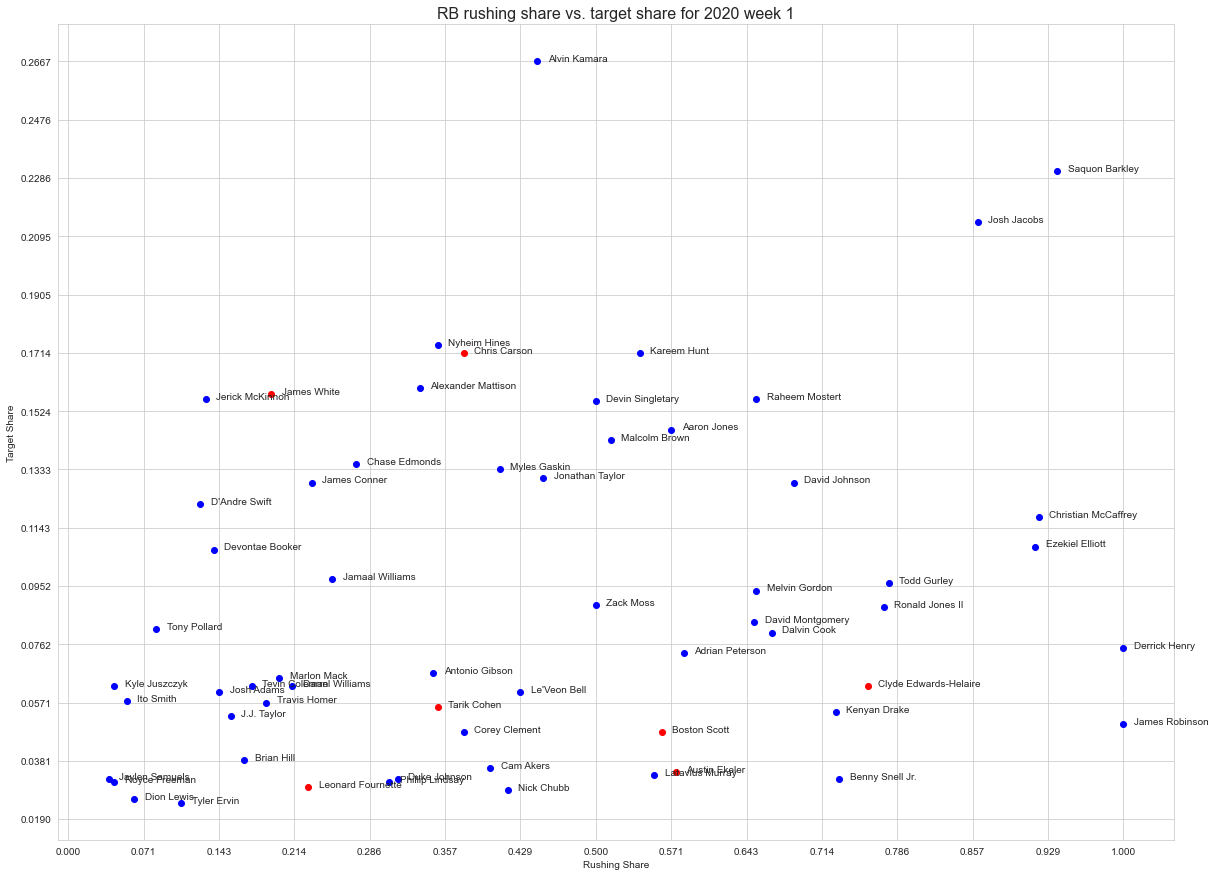

In [13]:
make_rb_tgt_share_viz(week1, player_list=player_list)

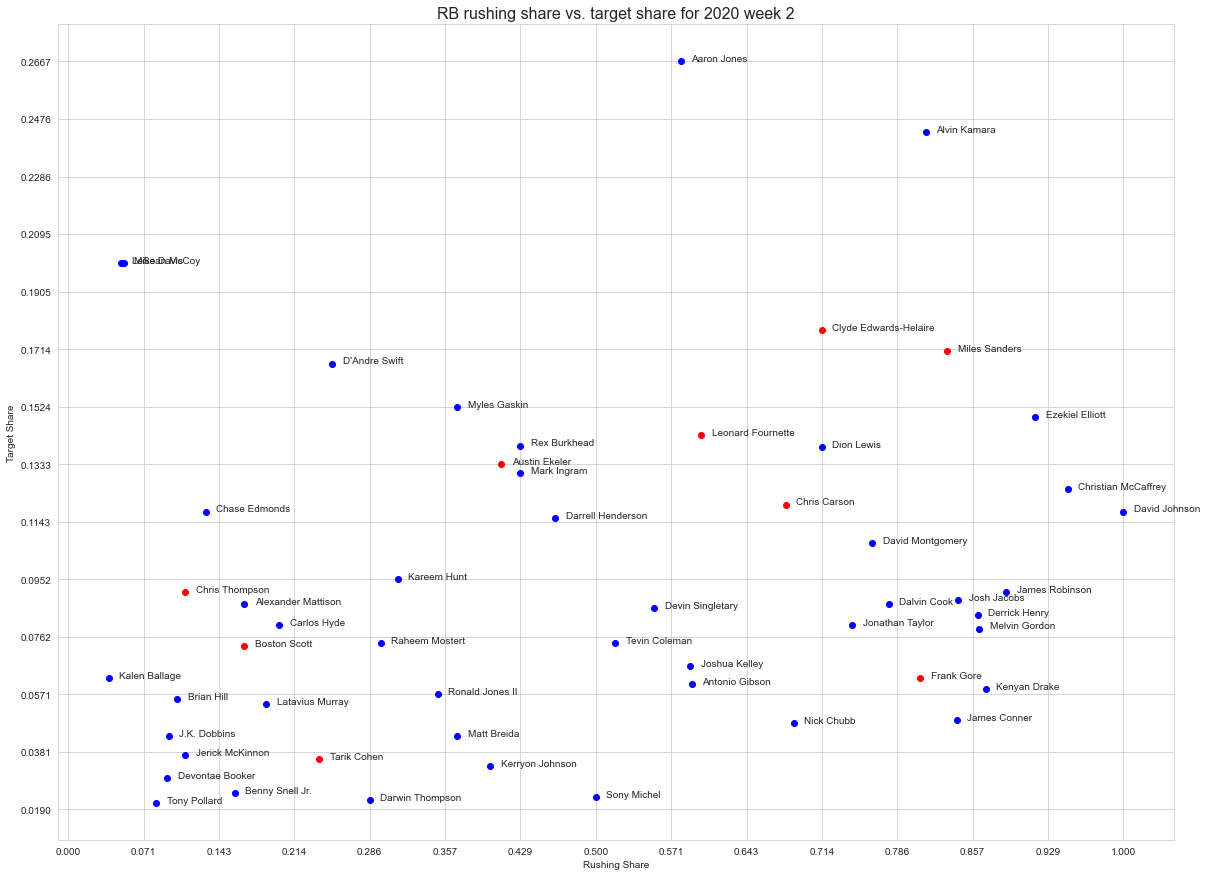

In [14]:
make_rb_tgt_share_viz(week2, player_list=player_list)